<a href="https://colab.research.google.com/github/biancaamorimelo/my-notes/blob/master/exploratory_analysis_nba_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Análise exploratória dos jogadores da NBA de 1996 a 2021

In [ ]:
# Importando as bibliotecas do Python
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lendo o arquivo CSV
df = pd.read_csv("all_seasons.csv")

In [ ]:
# Mostrando os primeiros registros da tabela
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [22]:
# Find unique values of a column
print(df['country'].unique())
print(df.country.unique())

['USA' 'Congo' 'Nigeria' 'Lithuania' 'Canada' 'Ukraine'
 'Serbia and Montenegro' 'Croatia' 'Jamaica' 'Slovenia'
 'US Virgin Islands' 'France' 'St. Vincent & Grenadines' 'Georgia'
 'New Zealand' 'Dominican Republic' 'Germany' 'England' 'Belize' 'Mexico'
 'Puerto Rico' 'China' 'Turkey' 'Finland' 'Greece' 'Senegal' 'Mali'
 'U.S. Virgin Islands' 'Argentina' 'Yugoslavia' 'Spain' 'Venezuela'
 'Serbia' 'Haiti' 'Russia' 'Czech Republic' 'Poland' 'Netherlands'
 'Scotland' 'Brazil' 'Ireland' 'Montenegro' 'Latvia'
 'Democratic Republic of the Congo' 'South Korea' 'United Kingdom'
 'Uruguay' 'Sudan (UK)' 'Australia' 'USSR' 'Switzerland' 'Italy' 'Gabon'
 'Iran' 'Cameroon' 'Israel' 'Sweden' 'Tanzania' 'Panama' 'Bosnia'
 'Great Britain' 'Macedonia' 'Bosnia & Herzegovina' 'Tunisia' 'Cabo Verde'
 'South Sudan' 'Ghana' 'Bahamas' 'Austria' 'Egypt'
 'Bosnia and Herzegovina' 'Japan' 'Trinidad and Tobago'
 'Republic of the Congo' 'Saint Lucia' 'DRC' 'Angola' 'Sudan' 'Guinea'
 'Denmark' 'Colombia' 'Portugal'

In [ ]:
# Contando quantos registros existem na tabela
df.count()

Unnamed: 0           12305
player_name          12305
team_abbreviation    12305
age                  12305
player_height        12305
player_weight        12305
college              12305
country              12305
draft_year           12305
draft_round          12305
draft_number         12305
gp                   12305
pts                  12305
reb                  12305
ast                  12305
net_rating           12305
oreb_pct             12305
dreb_pct             12305
usg_pct              12305
ts_pct               12305
ast_pct              12305
season               12305
dtype: int64

In [ ]:
# Identificando o tipo de objeto do dataframe
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Listando os tipos de dados de todas as colunas do DataFrame
df.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [13]:
# Saída básica estatpistica para o número de colunas
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [14]:
# Calculando o desvio padrão para todas as colunas numéricas
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Unnamed: 0       3552.291866
age                 4.335868
player_height       9.146321
player_weight      12.477150
gp                 25.095909
pts                 5.974957
reb                 2.483550
ast                 1.794155
net_rating         12.673254
oreb_pct            0.043599
dreb_pct            0.062704
usg_pct             0.053390
ts_pct              0.101163
ast_pct             0.094483
dtype: float64

In [16]:
dfCurry = df.loc[df["player_name"] == "Stephen Curry"]

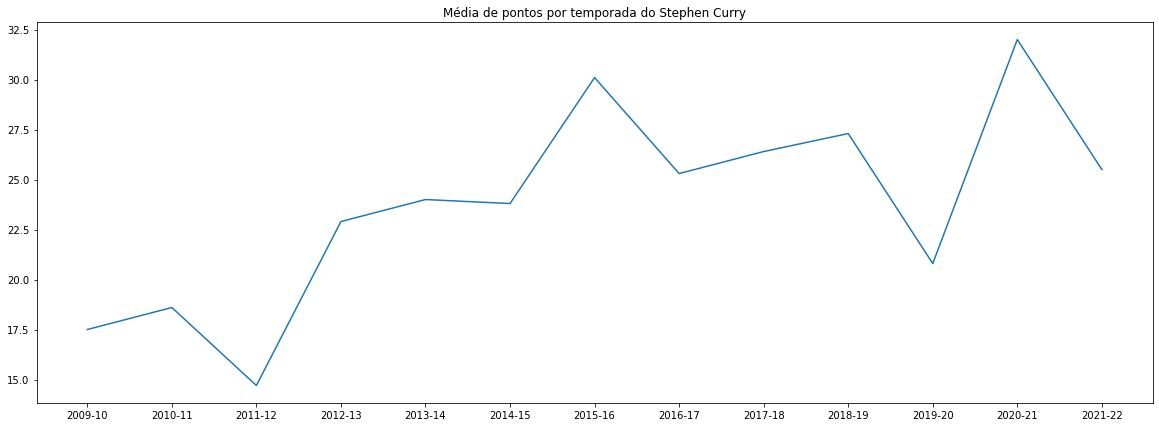

In [17]:
plt.figure(figsize=(20,7))
plt.title("Média de pontos por temporada do Stephen Curry")
plt.plot(dfCurry['season'], dfCurry['pts'])
plt.show()

In [24]:
df.loc[df["country"] == "Brazil"]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3018,3018,Nene,DEN,20.0,210.82,117.933920,None,Brazil,2002,1,...,10.5,6.1,1.9,-7.0,0.108,0.156,0.191,0.545,0.119,2002-03
3114,3114,Nene,DEN,21.0,210.82,117.933920,None,Brazil,2002,1,...,11.8,6.5,2.2,4.9,0.072,0.161,0.171,0.578,0.104,2003-04
3131,3131,Leandro Barbosa,PHX,21.0,190.50,79.832192,None,Brazil,2003,1,...,7.9,1.8,2.4,-4.0,0.018,0.075,0.183,0.553,0.175,2003-04
3667,3667,Anderson Varejao,CLE,22.0,208.28,104.326160,None,Brazil,2004,2,...,4.9,4.8,0.5,4.9,0.139,0.211,0.142,0.534,0.050,2004-05
3778,3778,Leandro Barbosa,PHX,22.0,190.50,85.275296,None,Brazil,2003,1,...,7.0,2.1,2.0,-0.5,0.033,0.092,0.190,0.575,0.187,2004-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,11533,Anderson Varejao,CLE,38.0,210.82,117.933920,None,Brazil,2004,2,...,2.6,4.0,0.6,-37.6,0.146,0.342,0.228,0.326,0.150,2020-21
11555,11555,Bruno Caboclo,HOU,25.0,205.74,98.883056,None,Brazil,2014,1,...,2.8,2.3,0.2,2.3,0.064,0.268,0.232,0.475,0.048,2020-21
11645,11645,Didi Louzada,NOP,21.0,195.58,85.275296,None,Brazil,2019,2,...,2.7,1.0,1.0,-7.3,0.015,0.032,0.114,0.308,0.073,2020-21
11745,11745,Didi Louzada,POR,22.0,195.58,85.275296,None,Brazil,2019,2,...,3.9,1.9,0.6,-29.1,0.034,0.096,0.130,0.517,0.070,2021-22


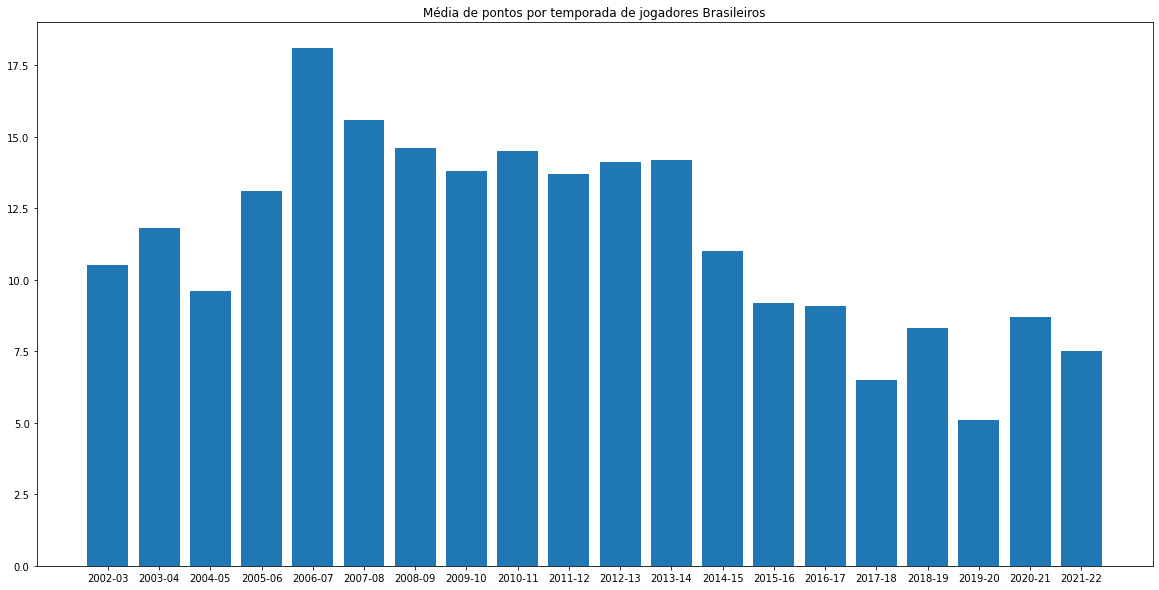

In [30]:
plt.figure(figsize=(20,10))
plt.title("Média de pontos por temporada de jogadores Brasileiros")
plt.bar(dfBrazil['season'], dfBrazil['pts'])
plt.show()

In [50]:
# Calcular a média para todas as colunas numericas
dfBrazil.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


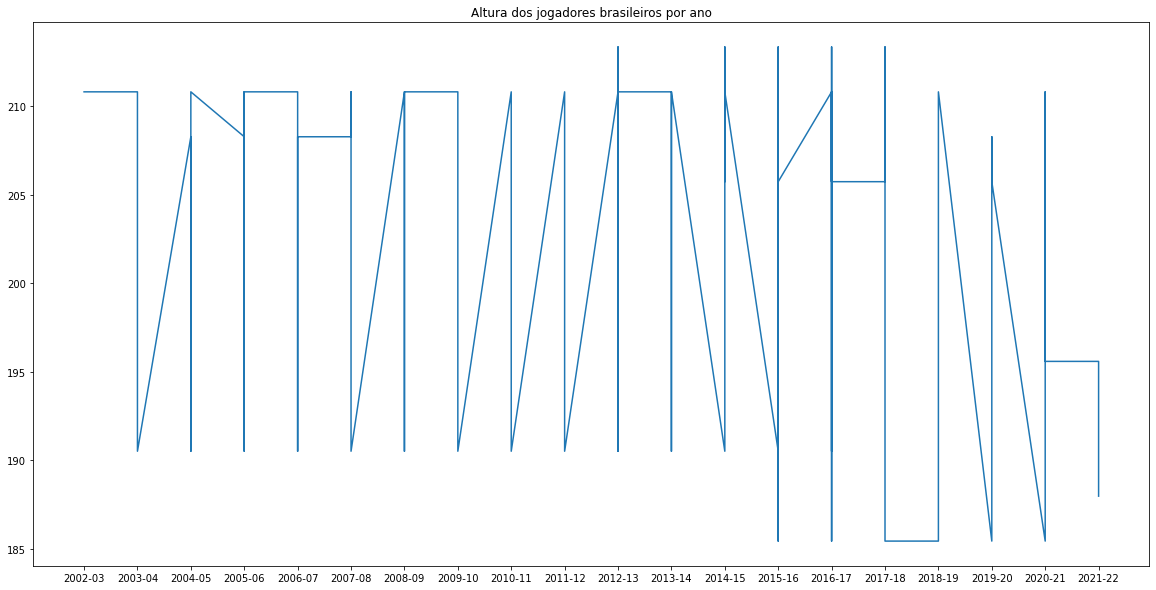

In [54]:
plt.figure(figsize=(20,10))
plt.title("Altura dos jogadores brasileiros por ano")
plt.plot(dfBrazil['season'], dfBrazil['player_height'])
plt.show()